Basement railing segmentation model - inference and training
-------

### Setup YOLOv5 and a few other things

In [14]:
# download and install yolov5
# this script assumes that the notebook has access to its parent directory
!git clone https://github.com/ultralytics/yolov5 ../yolov5
%cd ../yolov5
!pip install -qr requirements.txt

# install weights and biases
# it's optional but highly recommended
#!pip install wandb

# other libraries
from IPython.display import Image
import os

/home/aneddy/code/vvogit/basement-railing-segmentation/yolov5


### Inference 

Use our model to detect/segment basement railings

In [3]:
# download the model we trained using the proceduce described in the paper
!curl https://dunnion.ucd.ie/~anhvu/data/permanent/221111-basement-railing-merrionsq-all-best.pt --output 221111-basement-railing-merrionsq-all-best.pt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 91.5M  100 91.5M    0     0  27.4M      0  0:00:03  0:00:03 --:--:-- 27.4M


Use the model to detect/segment basement railings in every image residing in [../data/221111-basement-railing-merrionsq/test/images](../data/221111-basement-railing-merrionsq/test/images). You can drop your own images there to test.

In [15]:
!python segment/predict.py --img 1280 --weights 221111-basement-railing-merrionsq-all-best.pt --source ../data/221111-basement-railing-merrionsq/test/images

segment/predict: weights=['221111-basement-railing-merrionsq-all-best.pt'], source=../data/221111-basement-railing-merrionsq/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-5-gbfa1f23 Python-3.10.6 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3914MiB)

Fusing layers... 
Model summary: 275 layers, 47468982 parameters, 0 gradients, 146.4 GFLOPs
image 1/5 /home/aneddy/code/vvogit/basement-railing-segmentation/data/221111-basement-railing-merrionsq/test/images/131614248904223.jpg: 736x1280 1 basement-railing, 142.9ms
image 2/5 /home/aneddy/code/vvogit/basement-railing-segmentation/data/221

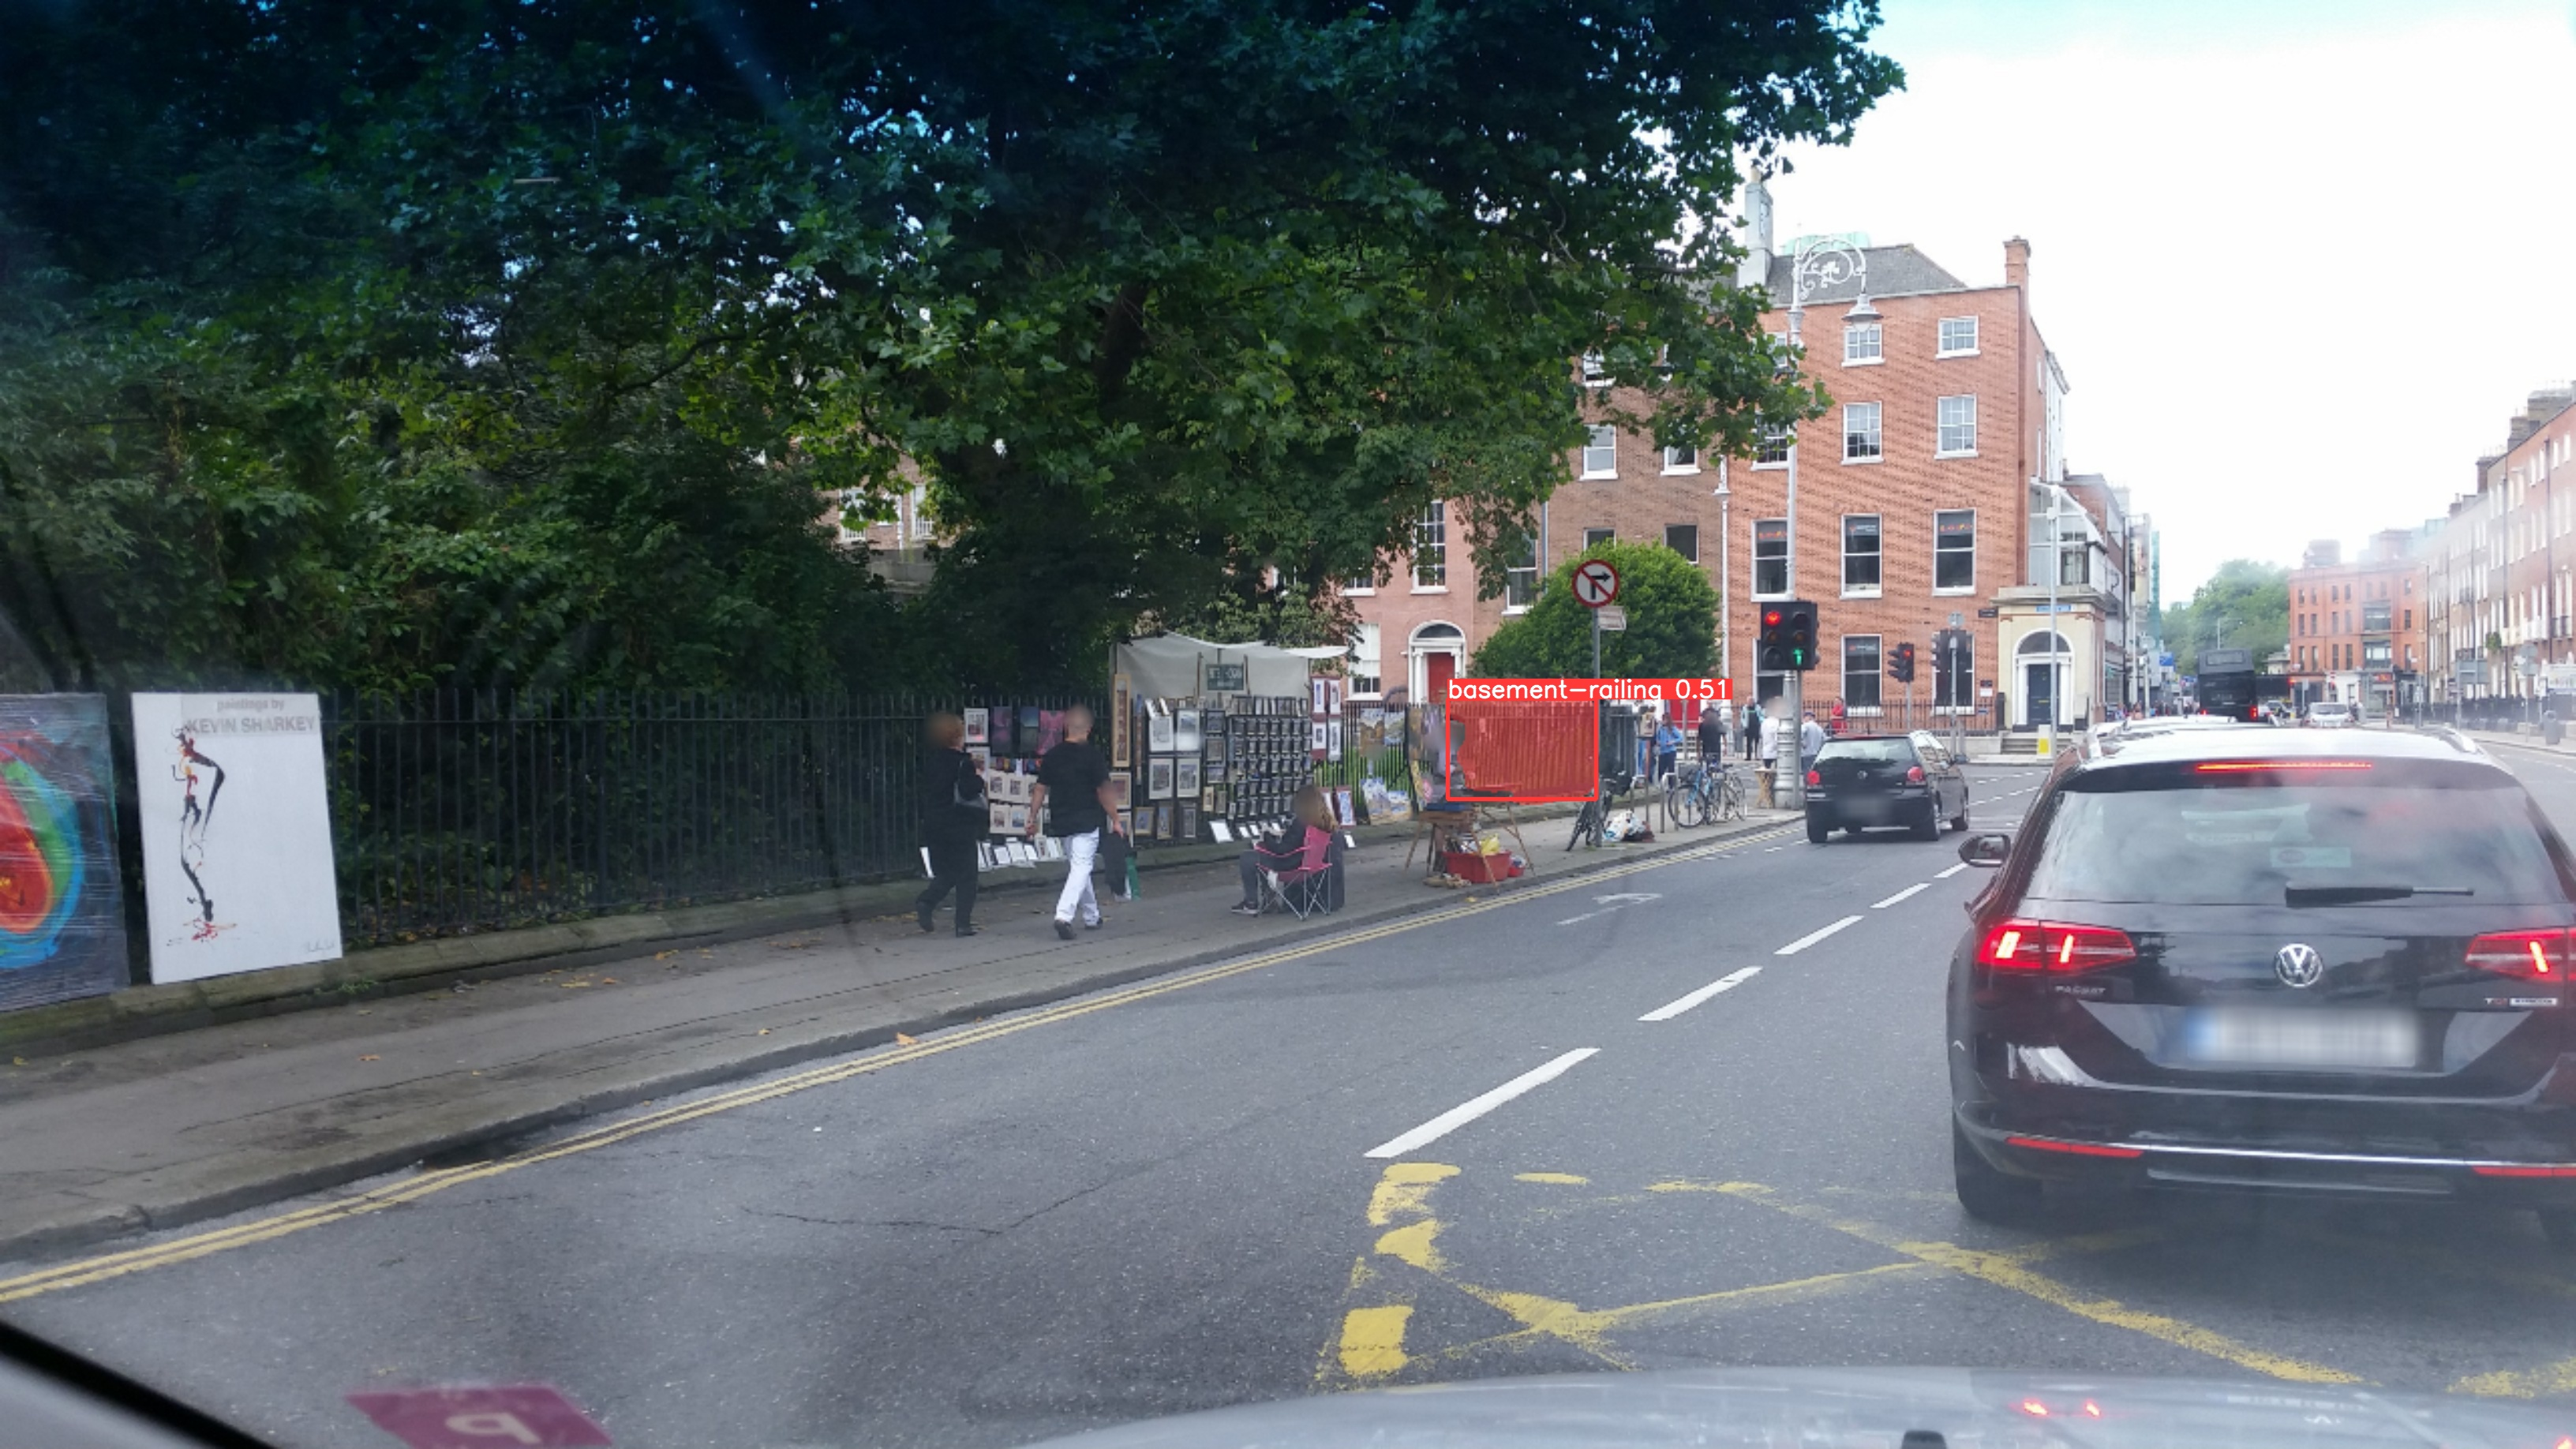

In [30]:
# Look for the result directory in the previous cell's output ("Results saved to ..."). Put the path of the directory below.
odir = 'runs/predict-seg/exp'

# display an image in the directory
oimages = [i for i in os.listdir(odir) if i.endswith('.jpg')]
img_path = os.path.join(odir, oimages[0])
Image(img_path)

### Training

Replicate the training described in the paper.

Required setup:
* Download images and labels, see [download-221111-basement-railing-merrionsq.ipynb](download-221111-basement-railing-merrionsq.ipynb)
* Set up data for training and validation via the YAML files in [../data/221111-basement-railing-merrionsq](../data/221111-basement-railing-merrionsq)
* Set hyperparameters. See YOLOv5's tutorials for details. To obtain the results reported in theh paper, we used the default parameters in 'YOLOv5_ROOT/data/hyps/hyp.scratch-low.yaml'.

In [33]:
# Execute the training
# NB You will need about 40GB GPU memory if you keep the parameters below (i.e., `--img 1280 --batch 32`). If you simply want to check how the code work without having a big GPU machine, you can try `--img 320 --batch 1`. This of course won't give you an accurate model.
!python segment/train.py --img 1280 --batch 32 --epochs 100 --data ../data/221111-basement-railing-merrionsq/data-all.yaml --weights yolov5l-seg.pt --freeze 9 --cache

segment/train: weights=yolov5l-seg.pt, cfg=, data=../data/221111-basement-railing-merrionsq/data-all.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=4, batch_size=1, imgsz=120, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[9], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-5-gbfa1f23 Python-3.10.6 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3914MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.01

train: Scanning /home/aneddy/code/vvogit/basement-railing-segmentation/data/2211
train: WARNING ⚠️ /home/aneddy/code/vvogit/basement-railing-segmentation/data/221111-basement-railing-merrionsq/part-4/images/1349977848721106.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.003]
train: New cache created: /home/aneddy/code/vvogit/basement-railing-segmentation/data/221111-basement-railing-merrionsq/part-1/labels.cache
train: Caching images (0.0GB ram): 100%|██████████| 156/156 00:02
val: Scanning /home/aneddy/code/vvogit/basement-railing-segmentation/data/221111
val: New cache created: /home/aneddy/code/vvogit/basement-railing-segmentation/data/221111-basement-railing-merrionsq/part-1/labels.cache
val: Caching images (0.0GB ram): 100%|██████████| 40/40 00:00

AutoAnchor: 2.43 anchors/target, 0.819 Best Possible Recall (BPR). Anchors are a poor fit to dataset ⚠️, attempting to improve...
AutoAnchor: WARNING ⚠️ Extremely small objects found: 93 of 474 l